# Welcome to lab_regression! <img src="https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/items/poke-ball.png" width="35" style="vertical-align: middle; margin-bottom: 4px;"/>

One of the coolest parts of data science is **prediction** with **machine learning**. Up until now, we have done a myriad of data analysis given existing data. We have even generated our own data in simulations! Today, using some foundational concepts of machine learning, we will be making predictions based on data!

As you learned in lecture, **linear regression** is a powerful tool that can be used to quantify trends in data. We can use our Python skills to perform **simple linear regression** in this lab! 


A few tips to remember:

- **You are not alone on your journey in learning programming!** You have your lab TA, your CAs, your lab group, and the professors (Prof. Wade and Prof. Karle), who are all here to help you out!
- If you find yourself stuck for more than a few minutes, ask a neighbor or course staff for help! When you are giving help to your neighbor, explain the **idea and approach** to the problem without sharing the answer itself so they can have the same ***ah-hah*** moment!
- We are here to help you! Don't feel embarrassed or shy to ask us for help!

Let's get started!

In [49]:
# Meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = "Tyler"
ca1_name = "Renee"
ca2_name = "Talia"
ca3_name = ""


# Say hello to each other!
# - Groups of 3 are ideal :)
# - However, groups of 2 or 4 are fine too!
#
# Question of the Day (QOTD) to Ask Your Group: "What was your favorite thing about DISCOVERY this semester?"
partner1_name = "Advait"
partner1_netid = ""
partner1_DISCOVERYfave = "advaitg2"

partner2_name = "Ravi"
partner2_netid = "ravip2"
partner2_DISCOVERYfave = ""

partner3_name = ""
partner3_netid = ""
partner3_DISCOVERYfave = ""


# Which lab section are you in? Record it below! It should start with a Y and have 
# 2 numbers after the Y. If you're unsure - ask your TA/CAs!
lab_section = "Y10"

## Part 1: Exploring the Pokemon Data
Today, we'll be working with a **Pokemon** dataset. For those unfamiliar, Pokemon are creatures that can be captured (caught) to fight alongside their trainers in the mythical Pokemon world featured in countless video games, cartoons, and cards. There are **tons** of Pokemon out there, so for the purposes of this lab, we will be dealing with pokemon from Generation One (Gen. One) to Generation Seven (Gen. Seven). Each Pokemon in the dataset is accompanied by its core attributes: Total Base Stat, Attack, Defense, HP, etc. 
 We will use basic **machine learning** techniques in this lab to **predict Total Base Stat** with a **linear regression** model. 

But before we approach this implementation of **simple linear regression**, let's **familiarize ourselves with the data** by doing some **EDA (Exploratory Data Analysis)**. This will include:
- Viewing a correlation matrix of our data
- Plotting visualizations to visually see relationships in the data

## Puzzle 1.1: Loading In the Data
We've provided you with a `pokemon.csv` file containing the Pokemon Dataset. You know the drill. Let's **import the Pokemon Dataset** in the cell below. Make sure you name your DataFrame `df`. 

In [50]:
import pandas as pd

df = pd.read_csv("pokemon.csv")
df

,Pokedex Number,Name,Primary Type,Secondary Type,Height (m),Weight (kg),Total Base Stat,Attack,Defense,HP,Speed,Special Attack,Special Defense,Legendary
0,1,Bulbasaur,grass,poison,0.7,6.9,318,49,49,45,45,65,65,0
1,2,Ivysaur,grass,poison,1.0,13.0,405,62,63,60,60,80,80,0
2,3,Venusaur,grass,poison,2.0,100.0,625,100,123,80,80,122,120,0
3,4,Charmander,fire,NaN,0.6,8.5,309,52,43,39,65,60,50,0
4,5,Charmeleon,fire,NaN,1.1,19.0,405,64,58,58,80,80,65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,Celesteela,steel,flying,9.2,999.9,570,101,103,97,61,107,101,1
797,798,Kartana,grass,steel,0.3,0.1,570,181,131,59,109,59,31,1
798,799,Guzzlord,dark,dragon,5.5,888.0,570,101,53,223,43,97,53,1
799,800,Necrozma,psychic,NaN,2.4,230.0,600,107,101,97,79,127,89,1


In [51]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert ( 'df' in vars() ), "Your DataFrame should be named df."
assert( len(df) == 801 ), "This is not the Pokemon Dataset we are looking for..."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.2: Narrowing Down our Dataset
You may have noticed that our `df` contains both **quantitative** (numerical) and **qualitative** (text-based) data. For this lab, we only want to consider **quantitative (numerical)** columns to predict **Total Base Stat**. Among the quantitative columns we only want to use the columns that capture **combat stats**. These are the columns titled **Total Base Stat, Attack, Defense, HP, Speed, Special Attack, and Special Defense**

Let's narrow down our dataset to only include the **quantitative (numerical) combat data**.

First, using the code cell below, define a **list** of **strings** called `numerical_cols` that contains all the columns in our `df` that capture **combat data**. 

In [52]:
numerical_cols = ["Total Base Stat", "Attack", "Defense", "HP", "Speed", "Special Attack", "Special Defense"]

Next, we're going to create a new DataFrame called `df_numerical` that **only includes** the **combat columns**. Do this in the cell below.

In [53]:
df_numerical = df[numerical_cols]
df_numerical

,Total Base Stat,Attack,Defense,HP,Speed,Special Attack,Special Defense
0,318,49,49,45,45,65,65
1,405,62,63,60,60,80,80
2,625,100,123,80,80,122,120
3,309,52,43,39,65,60,50
4,405,64,58,58,80,80,65
...,...,...,...,...,...,...,...
796,570,101,103,97,61,107,101
797,570,181,131,59,109,59,31
798,570,101,53,223,43,97,53
799,600,107,101,97,79,127,89


In [54]:
## == TEST CASES for Puzzle 1.2  ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors,/ check you previous cell, make changes, and RE-RUN your code and then this cell.
import numpy as np 
assert( ('numerical_cols' in vars()) and (type(numerical_cols) == list)), "You should be creating a list of numerical columns named `numerical_cols`."
assert( len(numerical_cols) == 7 ), "There are exactly 7 numerical columns in this dataset."
assert( all(df[col].dtype in (np.float64, np.int64) for col in numerical_cols) ), "There is a non-numerical column in `numerical_cols`."

assert( 'df_numerical' in vars() ), "The new DataFrame should be named`df_numerical`."
assert( len(df) == len(df_numerical) ), "df_numerical should be the same length as our original df."
assert (len(df_numerical.columns.to_list()) == 7 ), "df_numerical should have 7 columns."
assert( all(df_numerical[col].dtype in (np.float64, np.int64) for col in df_numerical.columns) ), "There is a non-numerical column in df_numerical."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.3: Correlation Matrix
In lecture, you learned about the correlation coefficient $r$ which measures the **strength of linear association** between two variables ($x$ and $y$).

Find the correlation coefficient matrix for the numeric data.

In [55]:
df_numerical.corr()

,Total Base Stat,Attack,Defense,HP,Speed,Special Attack,Special Defense
Total Base Stat,1.000000,0.730134,0.629620,0.620624,0.547666,0.741120,0.717434
Attack,0.730134,1.000000,0.468915,0.410616,0.352703,0.368154,0.265836
Defense,0.629620,0.468915,1.000000,0.242378,0.007934,0.241882,0.526348
HP,0.620624,0.410616,0.242378,1.000000,0.160760,0.365973,0.366971
Speed,0.547666,0.352703,0.007934,0.160760,1.000000,0.438981,0.225977
Special Attack,0.741120,0.368154,0.241882,0.365973,0.438981,1.000000,0.511496
Special Defense,0.717434,0.265836,0.526348,0.366971,0.225977,0.511496,1.000000


### ML Vocabulary: Features and Labels

Quick vocabulary lesson! In machine learning, we often organize **instances** in our dataset into **features** and **labels** (in this lab, an **instance** is one row of our DataFrame). 

**Features** are characteristics that describe each **instance** in our dataset. These **features** are the **inputs** fed into machine learning models that will make **predictions**. They are our **independent variables**, or $X$. 

**Labels** are the output or **target** variables we are **trying to predict**. They are our **dependent variables**, or $y$. 

In the context of our Pokemon dataset, the single **label** we are trying to predict is the **Total Base Stat** of a pokemon. 

### Analysis: Potential Features

**Q1: Given that our label (what we want to predict) is Total Base Stat, what are some *meaningful features* we could use to make a prediction? Use numbers from the correlation matrix to support your answer.**

*(✏️ Edit this cell to replace this text with your answer. ✏️)*

## Puzzle 1.4: Visualizations
For the purposes of this lab, we are ultimately interested in how we can best predict **Total Base Stat** with a **single feature** ($X$) from our DataFrame, `df`. 

But first, let's observe the relationships between various other columns in `df`. 

### Scatter Plot #1: Special Defense and Special Attack
Generate a scatter plot from `df` where the dependent variable ($y$) is `Special Defense` and independent variable ($X$) is `Special Attack`. Make sure to label the axes and have a title!

<Axes: title={'center': 'Special Defense and Attack'}, xlabel='Special Attack', ylabel='Special Defense'>

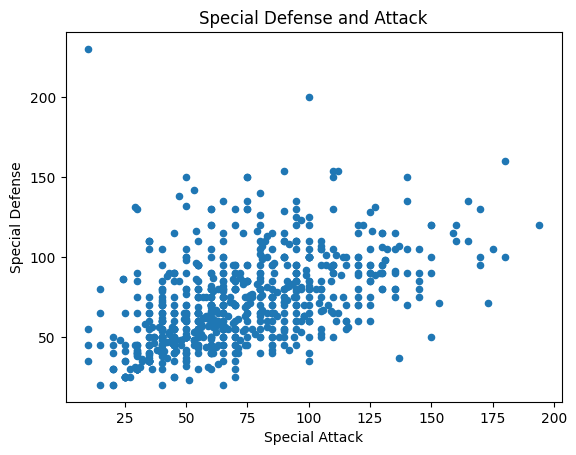

In [56]:
df.plot.scatter(x="Special Attack", y="Special Defense", xlabel="Special Attack", ylabel="Special Defense", title="Special Defense and Attack")

**Q2**: Do you see any *trends* in the scatter plot between **Special Defense** and **Special Attack**? If your group were to describe the *correlation*, how would you all describe it? 
Is the relationship positive or negative? Does it seem linear or non-linear? Is there a strong or weak *relationship* between the variables?

Discuss these questions with your group and summarize what was said in your group discussion below.

*(✏️ Edit this cell to replace this text with your answer. ✏️)*

### Scatter Plot #2: Speed and Defense
Generate a scatter plot from `df` where the dependent variable ($y$) is `Speed` and independent variable ($X$) is `Defense`. Make sure to label the axes and have a title!

<Axes: title={'center': 'Speed and Defense'}, xlabel='Defense', ylabel='Speed'>

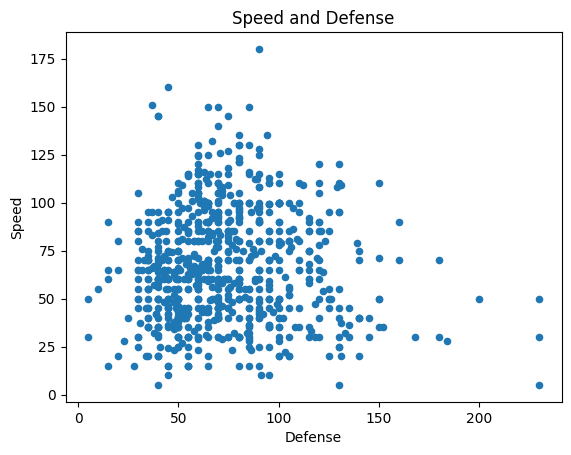

In [57]:
df.plot.scatter(y="Speed", x="Defense", ylabel="Speed", xlabel="Defense", title= "Speed and Defense")

**Q3**: Do you see any *trends* in the scatter plot between **Speed** and **Defense**? If your group were to describe the *correlation*, how would you all describe it? 
Is the relationship positive or negative? Does it seem linear or non-linear? Is there a strong or weak *relationship* between the variables?

Discuss these questions with your group and summarize what was said in your group discussion below.

*(✏️ Edit this cell to replace this text with your answer. ✏️)*

### Scatter Plot #3: Total Base Stat and Attack
Now, let's circle back to our original goal of predicting **Total Base Stat**. 

Generate a scatter plot from `df` where the dependent variable ($y$) is `Total Base Stat` and independent variable ($X$) is `Attack`. Make sure to label the axes and have a title!



<Axes: title={'center': 'Total Base Stat and Attack'}, xlabel='Attack', ylabel='Total Base Stat'>

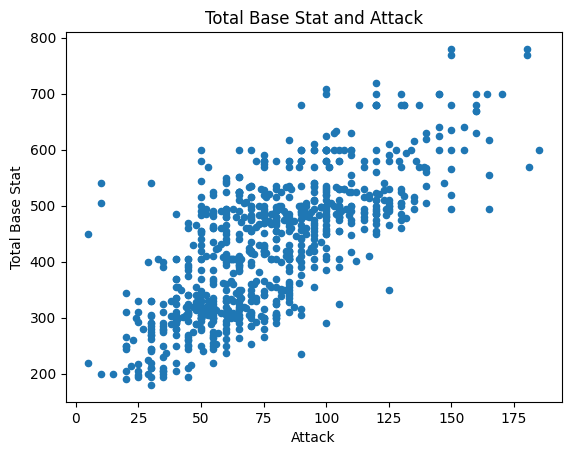

In [58]:
df.plot.scatter(y="Total Base Stat", x="Attack", ylabel= "Total Base Stat", xlabel="Attack", title="Total Base Stat and Attack")

**Q4**: Do you see any *trends* in the scatter plot between **Total Base Stat** and **Attack**? If your group were to describe the *correlation*, how would you all describe it? 
Is the relationship positive or negative? Does it seem linear or non-linear? Is there a strong or weak *relationship* between the variables?

Discuss these questions with your group and summarize what was said in your group discussion below.

*(✏️ Edit this cell to replace this text with your answer. ✏️)*

<hr style="color: #DD3403;">

# Part 2: Simple Linear Regression

From Scatter Plot #3 above, you may have noticed that **Total Base Stat** and **Attack** have significant **linear correlation**. 

In lecture, we learned that **linear regression** allows us to predict values based on a "line of best fit". The equation for simple linear regression is:

> $$y = (\text{slope}) * X + \text{intercept}$$

For this portion of the lab, we will be using **linear regression** to explore the relationship between **Attack** and **Total Base Stat** of pokemon in our `df`. 

We can apply formulas we have learned in lecture alongside Python to create a **linear regression model** to predict **Total Base Stat** ($y$) given **Attack** ($X$).

## Puzzle 2.1: Calculating Slope of the Regression Line
In lecture, you learned how to **calculate the slope** of the regression line given your $X$ and $y$ columns of data. The formula is as follows:

> $$\text{slope} = r * \frac{SD(y)}{SD(x)}$$

Where $r$ is the correlation coefficient between $X$ and $y$, and $SD$ stands for standard deviation. 

In the cell below, find the correlation coefficient and store it in a variable called `r`. 

In [59]:
r = df_numerical.corr()["Attack"]["Total Base Stat"]
r.item()

0.7301341119500759

With this, find the slope of the regression line where the dependent variable ($y$) is `Total Base Stat` and the independent variable ($X$) is `Attack`, storing your answer in the **numeric variable** `slope` below:

**Tip: Be sure to use `df_numerical` when getting $r$ from the correlation matrix. This is because some versions of Pandas will not run a correlation matrix on a DataFrame that contains non-numerical data.**

In [60]:
import numpy as np

slope = r * df_numerical["Total Base Stat"].std() / df_numerical["Attack"].std()
slope.item()

2.7063989564936697

**Q5: How do you interpret your slope?  What does it mean in terms of our problem?**

*(✏️ Edit this cell to replace this text with your answer. ✏️)*

## Puzzle 2.2: Calculating Intercept of the Regression Line
You also learned how to calculate the **y-intercept** of the regression line in lecture. The formula is as follows:

> $$\text{intercept} = \text{avg}(y) - \text{slope} * \text{avg}(X)$$

Find the **y-intercept** of the regression line between `Total Base Stat` ($y$) and `Attack` ($X$), storing your result in the numeric variable `intercept` below: 

In [61]:
intercept = (df_numerical["Total Base Stat"].mean() - slope * df_numerical["Attack"].mean())
intercept.item()

217.66309048343172

**Q6: How do you interpret your intercept?  What does it mean in terms of our problem?**

*(✏️ Edit this cell to replace this text with your answer. ✏️)*

In [62]:
## == TEST CASES for Puzzle 2.1, 2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors,/ check you previous cell, make changes, and RE-RUN your code and then this cell.
from math import isclose
assert( isclose(slope, 2.706398956493671) ), "The slope doesn't seem correct."
assert( isclose(intercept, 217.66309048343163) ), "The intercept doesn't seem correct."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Visualizing Your Work: Seaborn 

If you **do not** have the `seaborn` library installed, try running any one of following commands in your **terminal** until successful installation:
- `pip install seaborn`
- `pip3 install seaborn`
- `py -m pip install seaborn`
- `python3 -m pip install seaborn`

If you are still having import errors trying these commands, **let your lab CAs and TAs know**! They will help you through the installation process. 

Now that you have calculated the **slope** and **y-intercept** of your regression line, let's **visualize** it. Run the following code that uses the `seaborn` library to **plot a regression line** on top of a scatter plot of between `Attack` and `Total Base Stat` - your regression line will be **red**. 

Text(0.5, 1.0, 'Attack vs Total Base Stat')

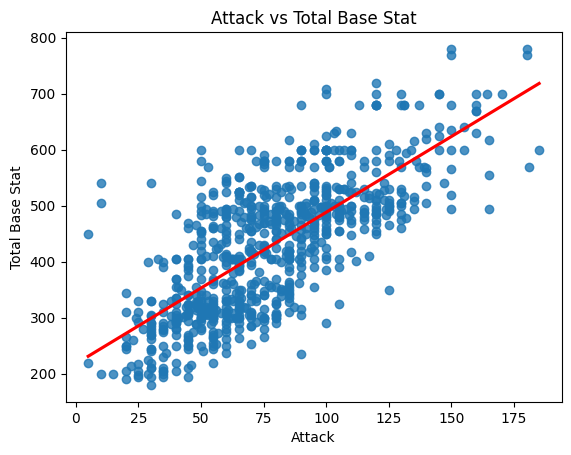

In [63]:
# Run the following code to see the regression line you made!!! :)
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot with regression line:
sns.regplot(data=df, x="Attack", y="Total Base Stat", ci=None, line_kws={'color':'red'})
plt.title("Attack vs Total Base Stat")

### Analysis: Regression Plot
**Q7: According to our model if a pokemon has an Attack of 100, what do we predict its Total Base Stat to be? (A range of answers are acceptable, just try your best to be accurate)**

*(✏️ Edit this cell to replace this text with your answer. ✏️)*

<hr style="color: #DD3403;">

# Part 3: Predictions and Residuals

## Puzzle 3.1: Predicting Total Base Stat

In Part 2, you found the intercept and slope for a line of best fit. Using your regression line, make a new column in our DataFrame `df` named `Total Base Stat Prediction`, which will store the **predicted Total Base Stat** for each Pokemon given its `Attack`. Use the values you calculated above in an equation of the regression line to populate this column. Remember,

> $$y = (\text{slope} * X) + \text{intercept}$$

In [64]:
df["Total Base Stat Prediction"] = (slope * df["Attack"]) + intercept
df["Total Base Stat Prediction"]

0      350.276639
1      385.459826
2      488.302986
3      358.395836
4      390.872624
          ...    
796    491.009385
797    707.521302
798    491.009385
799    507.247779
800    474.770991
Name: Total Base Stat Prediction, Length: 801, dtype: float64

In [65]:
## == TEST CASES for Puzzle 3.1  ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors,/ check you previous cell, make changes, and RE-RUN your code and then this cell.
from math import isclose
assert( 'Total Base Stat Prediction' in df.columns.to_list() ), "Your DataFrame df does not contain a new column `Total Base Stat Prediction`."
assert( isclose(df["Total Base Stat Prediction"].mean(), 428.37702871410744) ), "You have not calculated the predicted Total Base Stat correctly. Double-check your formula."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 3.2: Calculating Residuals
Residuals are the **differences between** the **observed (actual) value** of $y$ (`Total Base Stat`) and the **predicted value** of $y$ (`Total Base Stat Prediction`, or just $\hat{y}$).

Let's **find the residuals** and **evaluate** the simple regression model! 

In the following cell, write the Python code create a new column called `Residual` to store the **residuals** or prediction errors.

In [66]:
df["Residual"] = df["Total Base Stat"] - df["Total Base Stat Prediction"]

Now let us try to find out the top **20 pokemon** with the highest residual in absolute value and store it in a DataFrame `df_worst`.<br>
Hint: You will need to create a new column named **Absolute Residual** using the abs functionality.

In [69]:
df["Absolute Residual"] = df["Residual"].abs()

df_worst = df.sort_values(by="Absolute Residual", ascending=False).head(20)
df_worst

,Pokedex Number,Name,Primary Type,Secondary Type,Height (m),Weight (kg),Total Base Stat,Attack,Defense,HP,Speed,Special Attack,Special Defense,Legendary,Total Base Stat Prediction,Residual,Absolute Residual
241,242,Blissey,normal,NaN,1.5,46.8,540,10,10,255,55,75,135,0,244.727080,295.272920,295.272920
212,213,Shuckle,bug,rock,0.6,20.5,505,10,230,20,5,10,230,0,244.727080,260.272920,260.272920
64,65,Alakazam,psychic,NaN,1.5,48.0,600,50,65,55,150,175,105,0,352.983038,247.016962,247.016962
554,555,Darmanitan,fire,fire,1.3,92.9,540,30,105,105,55,140,105,0,298.855059,241.144941,241.144941
377,378,Regice,ice,NaN,1.8,175.0,580,50,100,80,50,100,200,1,352.983038,227.016962,227.016962
291,292,Shedinja,bug,ghost,0.8,1.2,236,90,45,1,40,30,30,0,461.238997,-225.238997,225.238997
717,718,Zygarde,dragon,ground,5.0,284.6,708,100,121,216,85,91,95,1,488.302986,219.697014,219.697014
112,113,Chansey,normal,NaN,1.1,34.6,450,5,5,250,50,35,105,0,231.195085,218.804915,218.804915
248,249,Lugia,psychic,flying,5.2,216.0,680,90,130,106,110,90,154,1,461.238997,218.761003,218.761003
379,380,Latias,dragon,psychic,1.4,40.0,700,100,120,80,110,140,150,1,488.302986,211.697014,211.697014


In [70]:
## == TEST CASES for Puzzle 3.2  ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors,/ check you previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert(abs(df['Residual'].sum()) < 0.0001), "The residuals might not be correct. Please check again!"
assert( 'Absolute Residual' in df.columns.to_list() ), "Your DataFrame df does not contain a new column `Absolute Residual`."
assert( 'df_worst' in vars() ), "You should be creating a DataFrame named `df_worst`."
assert( len(df_worst) == 20 ), "There should be 20 rows in df_worst."
assert(isclose(df_worst['Absolute Residual'].mean(), 213.2032132585081) ), "You have not populated the Absolute Residual column correctly."



## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 3.3: Legendary Pokemon
What percentage of the 20 pokemon in `df_worst` are legendary pokemon? Legendary Pokemon are ultra-rare, high-powered Pokemon. These pokemon have a value of 1 in the `Legendary` column of our DataFrame. Store the result in a variable named `percentage_legendary_worst`.

In [90]:
Legendary = df_worst[df_worst["Legendary"] == 1].sum()

percentage_legendary_worst =  Legendary / len(df_worst) * 100 
percentage_legendary_worst.item()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

**Q8: Does our model appear to perform worse on legendary or non-legendary pokemon? Think about what other information we need to answer this question. Use the code cell below to obtain this information and answer the question in the following markdown cell**

In [82]:
# Use this code cell to help answer Q8

avg_residuals = df.groupby("Legendary")["Absolute Residual"].mean()
avg_residuals

Legendary
0     61.692450
1    109.802943
Name: Absolute Residual, dtype: float64

*(✏️ Edit this cell to replace this text with your answer. ✏️)*

In [83]:
## == TEST CASES for Puzzle 3.3  ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors,/ check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(isclose(percentage_legendary_worst, round(np.pi * 0.1115, 2) )), "The percentage of Legendary Pokemon in the worst 20 residuals is not correct. Check your code."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

AssertionError: The percentage of Legendary Pokemon in the worst 20 residuals is not correct. Check your code.

<hr style="color: #DD3403;">

# Submission

You're almost done!  All you need to do is to commit your lab to GitHub:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and follow the Canvas instructions to commit this lab to your Git repository!

3. Your TA will grade your submission and provide you feedback after the lab is due. :)